## BERTScore Tutorial

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/My Drive/Colab Notebooks/experiments

/content/drive/My Drive/Colab Notebooks/experiments


In [ ]:
# install pytorch and huggingface transformers if you havn't done so
# !pip install torch==1.5.1
!pip install transformers==3.0.1

     |████████████████████████████████| 757 kB 5.0 MB/s 
     |████████████████████████████████| 3.0 MB 47.0 MB/s 
     |████████████████████████████████| 1.2 MB 50.2 MB/s 
     |████████████████████████████████| 895 kB 46.3 MB/s 


In [ ]:
# if you have not installed bert_score, it is very easy
# simply uncomment the line below to install through pip
!pip install bert_score==0.3.4

     |████████████████████████████████| 52 kB 894 kB/s 


We will first demonstrate how to use the `score` function in `bert_score`, which is what you need to evaluate a set of machine generated outputs.

In [ ]:
from bert_score import score

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth',1000)

In [ ]:
# cloning the repo because we need to get some example data
!git clone https://github.com/Tiiiger/bert_score.git

fatal: destination path 'bert_score' already exists and is not an empty directory.


In [ ]:
import pandas as pd
df = pd.read_csv("stockholm/wikipedia_music/nouns/wikipedia_nouns_labels_original_500.csv")

In [ ]:
df_sen = df.sentence[:100]

In [ ]:
df_sen

0                                                                                                                                                                                          ['Music is the art of arranging sounds in time to produce a composition through the elements of melody, harmony, rhythm, and timbre
1                                                                                                                                                                                                                                                           It is one of the universal cultural aspects of all human societies
2      General definitions of music include common elements such as pitch (which governs melody and harmony), rhythm (and its associated concepts tempo, meter, and articulation), dynamics (loudness and softness), and the sonic qualities of timbre and texture (which are sometimes termed the "color" of a musical sound)
3                                          

In [ ]:
df_sen.to_csv("hyps.txt", index=False)

In [ ]:
import pandas as pd
df1 = pd.read_csv("stockholm/wikipedia_music/nouns/wikipedia_nouns_labels_replaced_500.csv")

In [ ]:
df1_sen = df1.sentence[:100]

In [ ]:
df1_sen

0                                                                                                                                                                                          ['Music is the art of arranging sounds in time to produce a composition through the elements of melody, harmony, rhythm, and timbre
1                                                                                                                                                                                                                                                           It is one of the universal cultural aspects of all human societies
2      General definitions of music include common elements such as pitch (which governs melody and harmony), rhythm (and its associated concepts tempo, meter, and articulation), dynamics (loudness and softness), and the sonic qualities of timbre and texture (which are sometimes termed the "color" of a musical sound)
3                                          

In [ ]:
df1_sen.to_csv("refs.txt", index=False)

Inputs to `score` are a list of candidate sentences and a list of reference sentences. 

In [ ]:
with open("stockholm/wikipedia_music/nouns/hyps.txt") as f:
    cands = [line.strip() for line in f]

with open("stockholm/wikipedia_music/nouns/refs.txt") as f:
    refs = [line.strip() for line in f]

Let's have a look.

In [ ]:
cands[1]

'"[\'Music is the art of arranging sounds in time to produce a composition through the elements of melody, harmony, rhythm, and timbre"'

We are now ready to call the score function. Besides candidates and references, we need to speicify the bert model we are using. Since we are dealing with English sentences, we will use the default English model, which is *roberta-large* model.

In [ ]:
# When you are running this cell for the first time, 
# it will download the BERT model which will take relatively longer. 
P, R, F1 = score(cands, refs, lang="en", verbose=True)

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 1.35 seconds, 74.58 sentences/sec


The outputs of the `score` function are Tensors of precision, recall, and F1 respectively. Each Tensor has the same number of items with the candidate and reference lists. Each item in the list is a scalar, representing the score for the corresponding candidates and references.

In [ ]:
F1

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9893, 0.9969, 0.9880, 0.9967,
        1.0000, 0.9971, 1.0000, 1.0000, 0.9955, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 0.9972, 1.0000, 1.0000, 1.0000, 1.0000,
        0.9896, 0.9931, 0.9896, 1.0000, 1.0000, 0.9885, 1.0000, 0.9974, 1.0000,
        1.0000, 0.9878, 1.0000, 1.0000, 0.9817, 0.9767, 1.0000, 0.9926, 1.0000,
        0.9933, 0.9949, 0.9904, 0.9938, 0.9948, 0.9942, 0.9750, 0.9798, 1.0000,
        1.0000, 0.9920, 1.0000, 0.9903, 1.0000, 1.0000, 1.0000, 1.0000, 0.9863,
        1.0000, 1.0000, 0.9597, 0.9934, 0.9930, 0.9975, 0.9881, 1.0000, 1.0000,
        0.9838, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        0.9873, 1.0000, 0.9697, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9932,
        0.9948, 1.0000, 0.9975, 1.0000, 1.0000, 0.9946, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000])

We can take the average of all candidate reference pairs to be the system level score.

In [ ]:
print(f"System level F1 score: {F1.mean():.3f}")

System level F1 score: 0.996


It might also be very interestig to see the distribution of BERTScore.

In [ ]:
import matplotlib.pyplot as plt

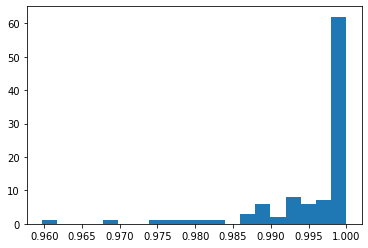

In [ ]:
plt.hist(F1, bins=20)
plt.show()

`bert_score` also provides a convenient function `plot_example` to support sentence-level visualization by plotting th e pairwise cosine similarity. Note that here we have not applied the idf weighting.

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

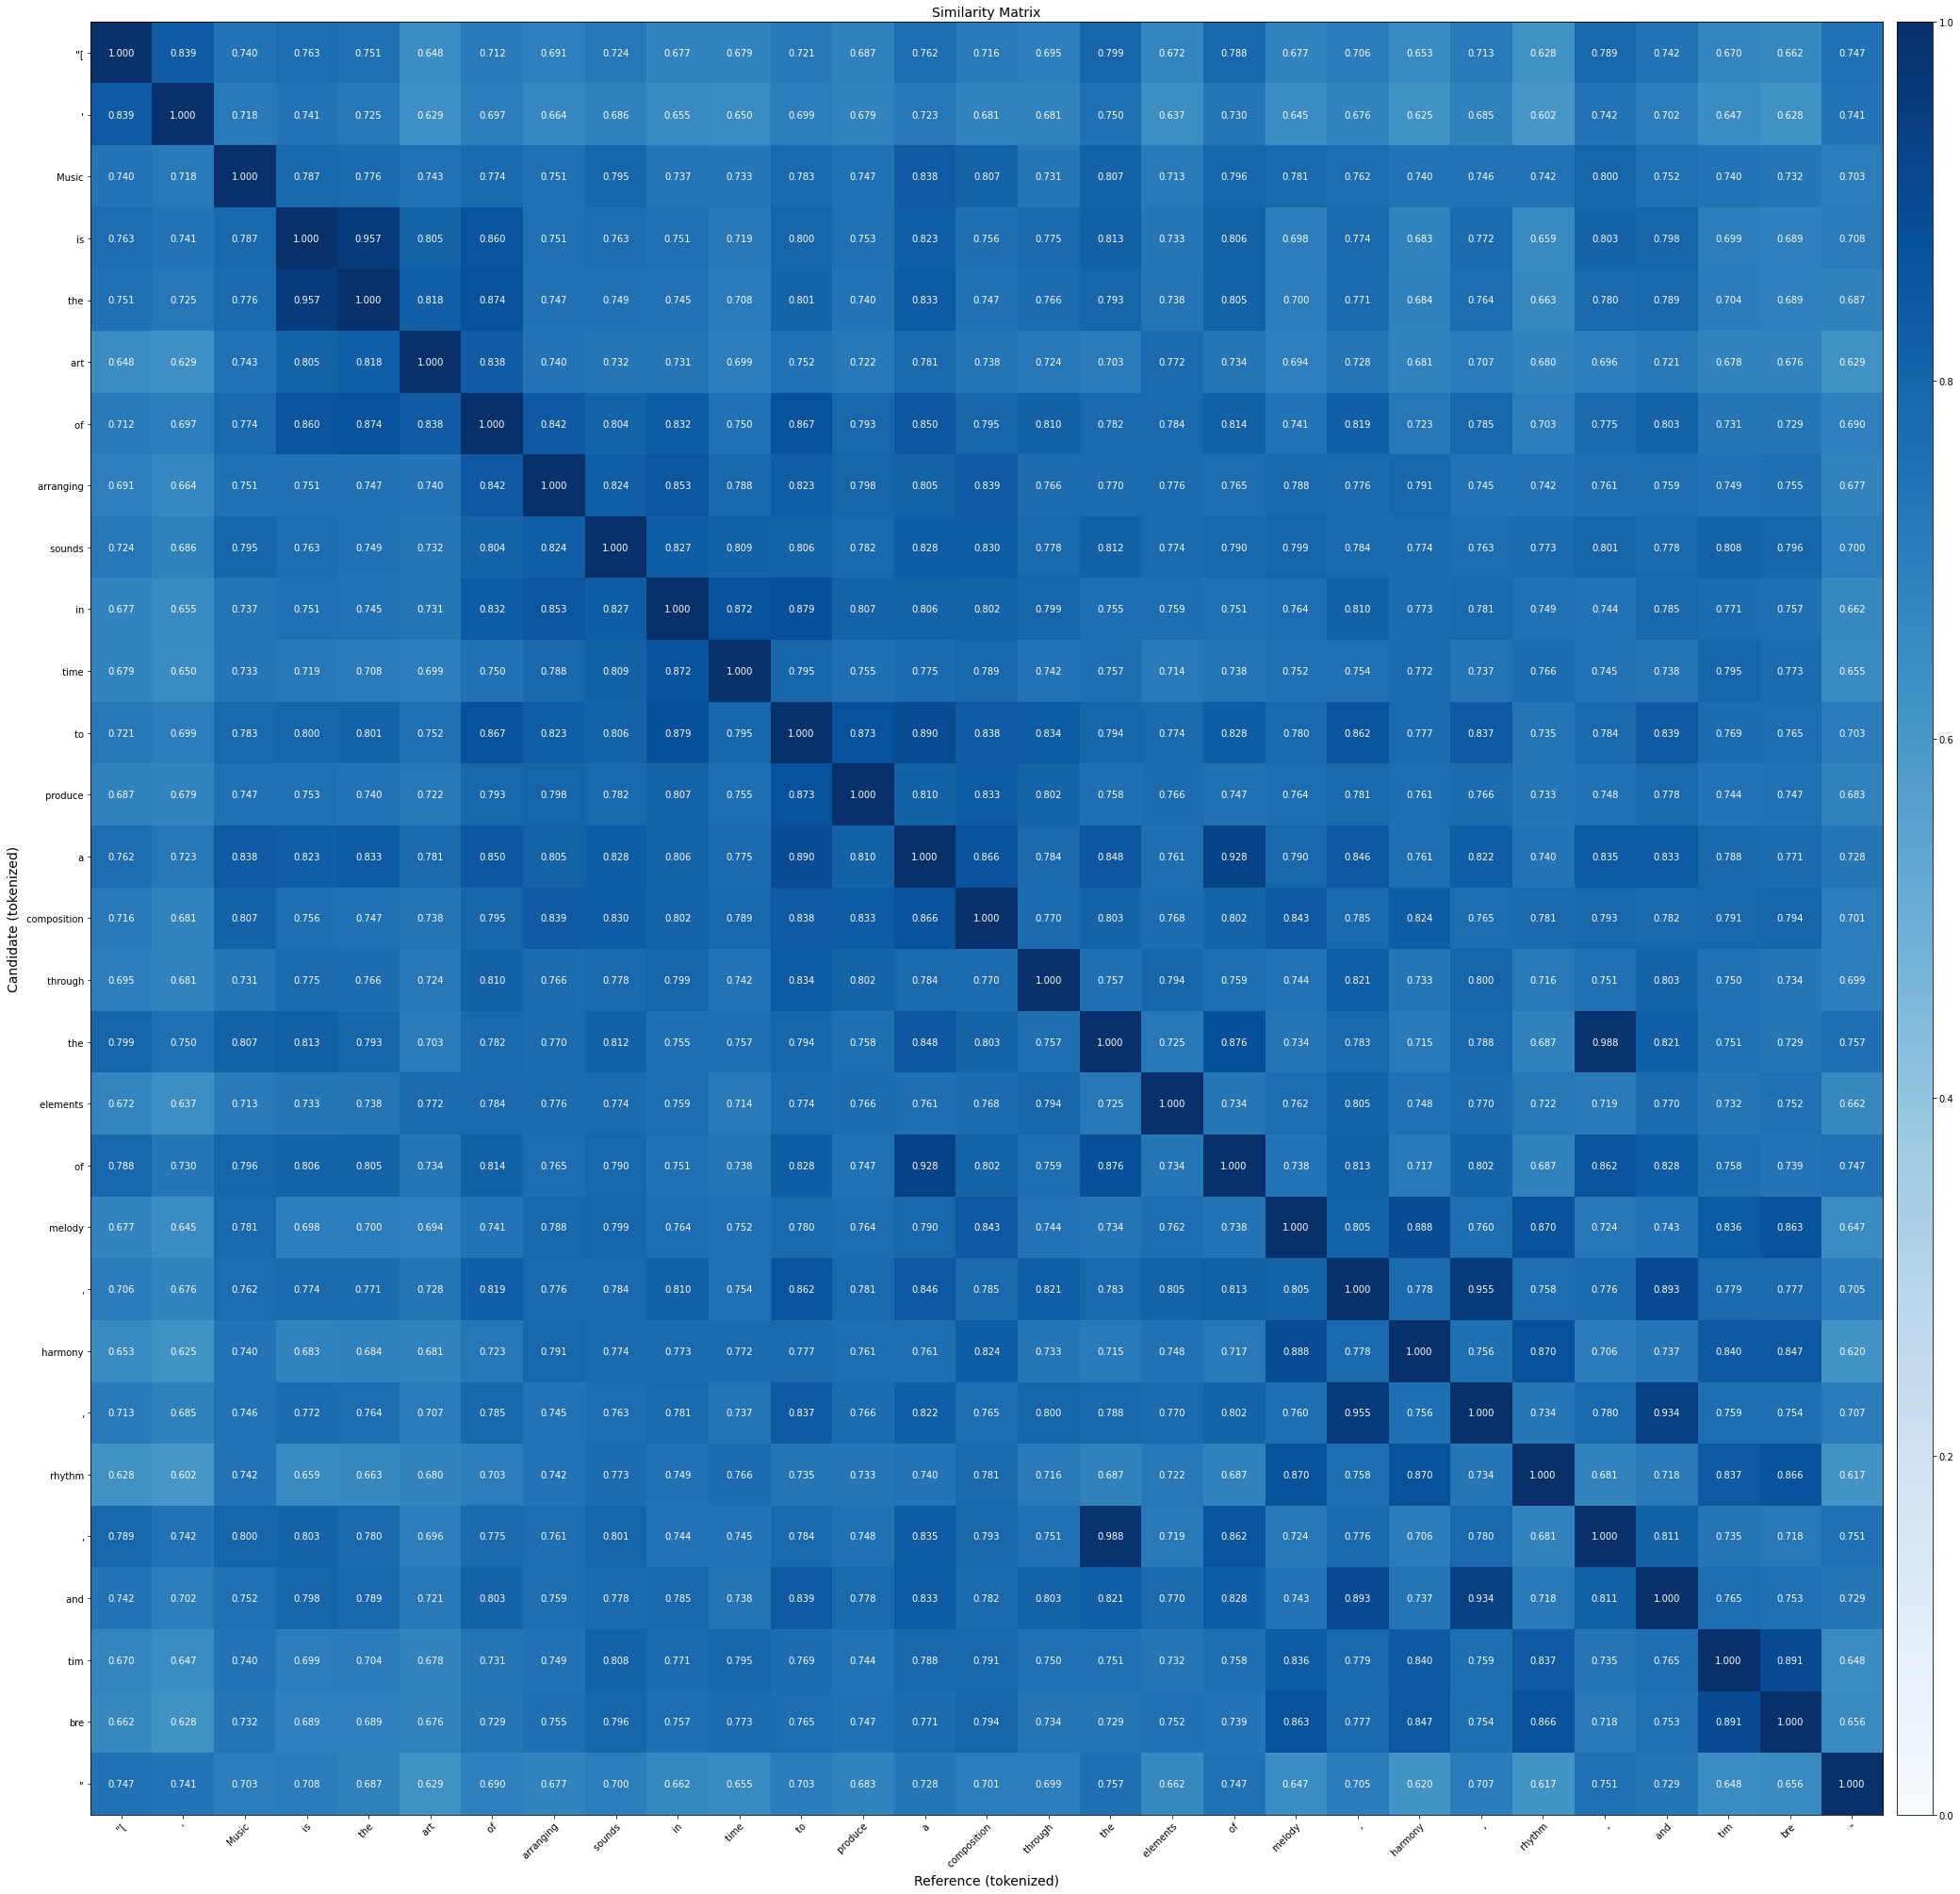

In [ ]:
from bert_score import plot_example

cand = cands[1]
ref = refs[1]
plot_example(cand, ref, lang="en")